## Problem 1. Load Data

In [23]:
# Python 3.6
# Shaoojun Yu
# Apr 20, 2019
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

In [35]:
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

# split data
x_train_new = []
y_train_new = []
x_validation = []
y_validation = []
for y in np.unique(y_train):
    idx = np.where(y_train == y)[0]
    X = x_train[idx]
    y = y_train[idx]
    X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    x_train_new.extend(X_trn)
    y_train_new.extend(y_trn)
    x_validation.extend(X_val)
    y_validation.extend(y_val)
x_train_new = np.array(x_train_new)
y_train_new = np.array(y_train_new)
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

print('Images in Train Set: ' + str(x_train.shape[0]))
print('Images in Test Set: ' + str(x_test.shape[0]))
print('Classes in Train Set: ' + str(np.unique(y_train).shape[0]))
print('Classes in Train Set: ' + str(np.unique(y_test).shape[0]))

Images in Train Set: 60000
Images in Test Set: 10000
Classes in Train Set: 10
Classes in Train Set: 10


## Problem 2.	Fully connected neural network

1) your choice of non-linear activation function (choice from ‘sigmoid’, ‘tanh’, ‘relu’ and etc).
 - The non-linear activation function can help NN to learn complex relationship between input and output. For **sigmoid** function, it has a problem of vanishing gradient when the input data is large. Secondly , its output isn’t zero centered. It makes the gradient updates go too far in different directions. Sigmoids also have slow convergence. For **tanh**,  it’s output is zero centered because its range in between -1 to 1 i.e -1 < output < 1 . Hence optimization is easier in this method hence in practice it is always preferred over Sigmoid function. but still it suffers from Vanishing gradient problem. For **ReLu**, it was recently proved that it had 6 times improvement in convergence from Tanh function. It’s just R(x) = max(0,x). Hence as seeing the mathamatical form of this function we can see that it is very simple and efficinent. It avoids and rectifies vanishing gradient problem. Almost all deep learning Models use ReLu nowadays.
 
2) your choice of the loss function for back-propagation.
 - This problem is an multi-class classification problem, so we should choose a loss function for multi-class. Cross-entropy is the default loss function to use for multi-class classification problems. If the targets are one-hot encoded, use `categorical_crossentropy`. If the targets are integers, use `sparse_categorical_crossentropy`.
 
3) your choice of the optimizer (‘sgd’, ‘adagra’, ‘adam’ and etc.). You can start with the default learning rate with the optimizer of your choice.
 - Adam = RMSprop + Momentum. Adam is more stable than the other optimizers, it doesn’t suffer any major decreases in accuracy. SGD works well for shallow networks. The main benefit of Adagrad is that we don’t need to tune the learning rate manually but its main weakness is that its learning rate is always Decreasing and decaying.

In [38]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
  tf.keras.layers.Dense(128, activation=tf.nn.relu), # full connected layer
  tf.keras.layers.Dense(32, activation=tf.nn.relu), # full connected layer
  tf.keras.layers.Dense(10,activation=tf.nn.softmax) # output layer
])
model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
history = model.fit(x_train_new, y_train_new, validation_data=(x_validation, y_validation),epochs=15)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 100us/sample - loss: 0.5076 - acc: 0.8175 - val_loss: 0.3737 - val_acc: 0.8662
Epoch 2/15
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3702 - acc: 0.8644 - val_loss: 0.3698 - val_acc: 0.8651
Epoch 3/15
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3362 - acc: 0.8754 - val_loss: 0.3546 - val_acc: 0.8722
Epoch 4/15
48000/48000 [==============================] - 4s 91us/sample - loss: 0.3127 - acc: 0.8840 - val_loss: 0.3371 - val_acc: 0.8763
Epoch 5/15
48000/48000 [==============================] - 4s 93us/sample - loss: 0.2995 - acc: 0.8883 - val_loss: 0.3219 - val_acc: 0.8852
Epoch 6/15
48000/48000 [==============================] - 4s 92us/sample - loss: 0.2844 - acc: 0.8935 - val_loss: 0.3272 - val_acc: 0.8823
Epoch 7/15
48000/48000 [==============================] - 4s 92us/sample - loss: 0.2757 - acc: 0.8955 - val_loss: 0

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


### 1) The number parameters of each layer
- Input layer(flatten_6 (Flatten)): Input layer has nothing to learn, at it’s core, what it does is just provide the input image’s shape. So no trainable parameters here. Thus number of parameters = 0.
- dense_17 (Dense): the product of the number of neurons in the current layer and the number of neurons on the previous layer. (784 + 1) * 128 = 100480
- dense_18 (Dense):（128 + 1） * 32 = 3128
- dense_19 (Dense): (32 + 1) * 10 = 330

### 2) Learning Curve

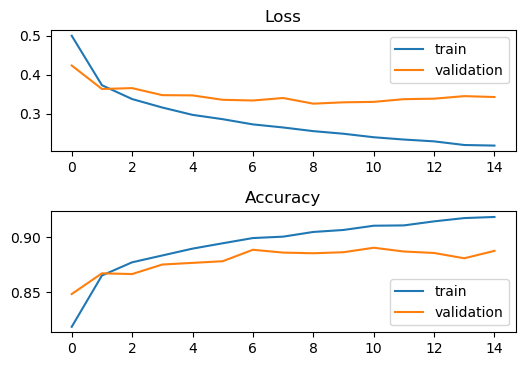

In [15]:
# plot loss during training
plt.figure(dpi=100)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

#### From the learning curve, we can observe overfitting, because the training accuracy is much higher than validation accuracy.

### 2) Test accuracy

In [52]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3646 - acc: 0.8775


0.8775

### 3) Add Dropout

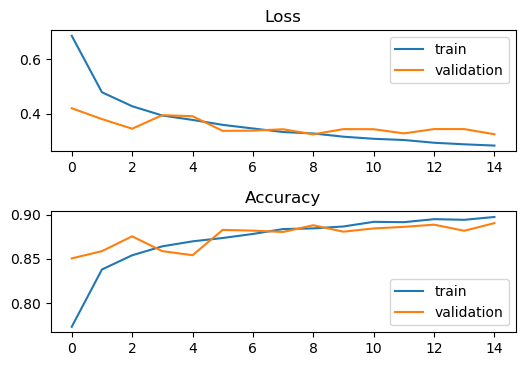

In [53]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
  tf.keras.layers.Dense(128, activation=tf.nn.relu), # full connected layer
  tf.keras.layers.Dense(32, activation=tf.nn.sigmoid),
  tf.keras.layers.Dropout(0.4), # Dropout
  tf.keras.layers.Dense(10,activation=tf.nn.softmax) # output layer
])
model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_new, y_train_new, 
                    validation_data=(x_validation, y_validation),
                    epochs=15,
                    verbose=0)

# plot loss during training
plt.figure(dpi=100)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

### From the learning curve, we can observe alleviation of the overfitting.

### 3) Test Accuracy

In [57]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3626 - acc: 0.8820


0.882

In [58]:
model.save('my_model_1.h5')